# Demo 3 - Classificação de sentimento em reviews de filmes com base do IMDB via RNNs (Recurrent Neural Networks)

Neste notebook iremos treinar uma Rede Neural Recorrent (RNN) para classificação de sentimento usando Keras (com Tensorflow como backend).

- Aluno(a): Mayke Kend Gomes Delgado.
- Prof. Ahirton Lopes
- Curso: Pós-Graduação em Ciência de Dados.
- Disciplina: Aprendizagem Profunda(Deep Learning).
- Matrícula: 1691690020

In [ ]:
#!pip install --upgrade keras

In [ ]:
%matplotlib inline

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.datasets import imdb

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Base de dados do IMDB (https://www.kaggle.com/iarunava/imdb-movie-reviews-dataset) 

Em seguida, carregaremos o conjunto de dados do IMDB. Na primeira vez, talvez tenhamos que baixar os dados, o que pode demorar um pouco. O conjunto de dados contém 50000 avaliações de filmes do Internet Movie Database, dividido em 25.000 avaliações para treinamento e 25.000 avaliações para testes. Metade dos comentários são positivos (1) e metade são negativos (0).

O conjunto de dados já foi pré-processado e cada palavra foi substituída por um índice inteiro.

As revisões são, portanto, representadas como sequências de comprimento variável de inteiros, como consta:

(Os índices de palavras começam em "3", como "1" é usado para marcar o início de uma revisão e "2" representa todas as palavras fora do vocabulário existente. "0" será usado posteriormente para preencher comentários mais curtos em um tamanho fixo .)


* Mais informações e créditos originais:

Maas, Andrew L. and Daly, Raymond E. and Pham, Peter T. and Huang, Dan and Ng, Andrew Y. and Potts, Christopher, "Learning Word Vectors for Sentiment Analysis", em Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, June, 2011. Portland, Oregon, USA. Association for Computational Linguistics. Pages 142 a150. Disponível em: http://www.aclweb.org/anthology/P11-1015

In [ ]:
# número de palavras mais frequentes para se utilizar:

nb_words = 20000

# cortar textos a partir do seguinte número de palavras (maxlenght):

maxlen = 100

print('Carregando...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()

print('Sequencias (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Carregando...
x_train: (25000,)
x_test: (25000,)

Sequencias (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


Mostrando nosso primeiro review no set de treinamento:

In [ ]:
print("Primeiro review no set de treinamento:\n \n", x_train[0], "comprimento:", len(x_train[0]), "classe:", y_train[0])

Primeiro review no set de treinamento:
 
 [ 1415    33     6    22    12   215    28    77    52     5    14   407
    16    82 10311     8     4   107   117  5952    15   256     4     2
     7  3766     5   723    36    71    43   530   476    26   400   317
    46     7     4 12118  1029    13   104    88     4   381    15   297
    98    32  2071    56    26   141     6   194  7486    18     4   226
    22    21   134   476    26   480     5   144    30  5535    18    51
    36    28   224    92    25   104     4   226    65    16    38  1334
    88    12    16   283     5    16  4472   113   103    32    15    16
  5345    19   178    32] comprimento: 100 classe: 1


## Inicialização

Vamos criar um modelo RNN que tenha uma (ou, opcionalmente, duas) camadas LSTM e de Dropout. 

A primeira camada na rede é uma camada de Embedding que converte índices inteiros em vetores densos de comprimento ´embedding_dims`. A camada de saída contém um único neurônio e uma não-linearidade do tipo sigmóide para coincidir com a groundtruth binária (`y_train`).

Finalmente, nós `compilamos ()` o modelo, usando entropia cruzada binária como a função de perda e [* RMSprop *] (https://keras.io/optimizers/#rmsprop) como otimizador.

In [ ]:
# Parâmetros do modelo:

embedding_dims = 50
lstm_units = 32

print('Construindo nosso modelo...')
model = Sequential()

model.add(Embedding(nb_words,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# se estiver executando sem GPU:
# Note que na camada de LSTM, foi inserida toda a classe, visto que usei várias ativações e sempre minha accuracy encontrava-se entre 78 a 83%
model.add(LSTM(lstm_units,
               activation="tanh",
               recurrent_activation="sigmoid",
               use_bias=True,
               kernel_initializer="glorot_uniform",
               recurrent_initializer="orthogonal",
               bias_initializer="zeros",
               unit_forget_bias=True,
               kernel_regularizer=None,
               recurrent_regularizer=None,
               bias_regularizer=None,
               activity_regularizer=None,
               kernel_constraint=None,
               recurrent_constraint=None,
               bias_constraint=None,
               dropout=0.0,
               recurrent_dropout=0.0,
               implementation=2,
               return_sequences=False,
               return_state=False,
               go_backwards=False,
               stateful=False,
               time_major=False,
               unroll=False,
            
               ))
                                
# Para empilhar várias camadas RNN, todas as camadas RNN, exceto a última
# precisam ter "return_sequences = True". Um exemplo de uso de duas camadas RNN:

#model.add(LSTM(lstm_units, return_sequences=True))
#model.add(LSTM(lstm_units))

model.add(Dense(1, activation='sigmoid'))

# Tentem utilizar outros otimizadores e configurações

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())


Construindo nosso modelo...
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_70 (Embedding)     (None, 100, 50)           1000000   
_________________________________________________________________
dropout_70 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 32)                10624     
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 33        
Total params: 1,010,657
Trainable params: 1,010,657
Non-trainable params: 0
_________________________________________________________________
None


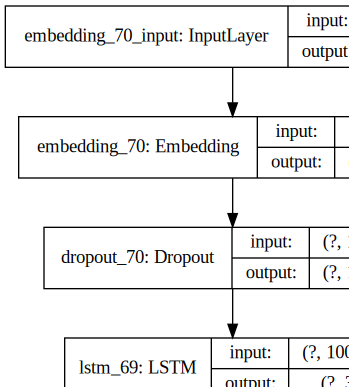

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Aprendizagem (Treino)

Agora estamos prontos para treinar nosso modelo. 

Lembrem-se que uma * época * significa uma passagem por todos os dados de treinamento. Note também que estamos usando uma fração dos dados de treinamento como nosso conjunto de validação.

Note que as camadas LSTMs são lentas para se treinar.

In [ ]:
%%time
epochs = 5
validation_split = 0.1

history = model.fit(x_train, y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)


Epoch 1/5
176/176 [==============================] - 3s 17ms/step - loss: 0.4658 - accuracy: 0.7768 - val_loss: 0.3697 - val_accuracy: 0.8388
Epoch 2/5
176/176 [==============================] - 3s 15ms/step - loss: 0.2873 - accuracy: 0.8826 - val_loss: 0.4219 - val_accuracy: 0.8440
Epoch 3/5
176/176 [==============================] - 3s 15ms/step - loss: 0.2303 - accuracy: 0.9097 - val_loss: 0.3663 - val_accuracy: 0.8480
Epoch 4/5
176/176 [==============================] - 3s 15ms/step - loss: 0.1975 - accuracy: 0.9266 - val_loss: 0.3498 - val_accuracy: 0.8516
Epoch 5/5
176/176 [==============================] - 3s 15ms/step - loss: 0.1731 - accuracy: 0.9364 - val_loss: 0.3678 - val_accuracy: 0.8480
CPU times: user 16.4 s, sys: 1.31 s, total: 17.7 s
Wall time: 15.1 s


Vamos plotar os dados para ver como o treinamento progrediu. 

Obs: Se observarmos um grande gap entre os valores de precisões de treinamento e validação isso normalmente sugere overfitting.

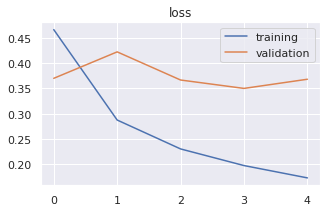

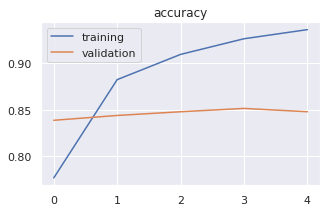

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'], label='training')
plt.plot(history.epoch,history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend(loc='best');

## Insights

Para melhor verificarmos a qualidade do modelo calculamos então nossa acurácia para os dados de teste:

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

782/782 - 3s - loss: 0.3759 - accuracy: 0.8472
accuracy: 84.72%


- No pré-processamento a variável nb_words estava com definição = 10000 a cerca do número de palavras, das quais são mais frequentes para se utilizar. Resolvi fazer um teste alterando para 20000 com intuito de cortar os textos a partir do *maxlenght* = 100 mediante ao seu comprimento máximo de palavras.

- Note que na camada de LSTM, foi inserida toda a classe, visto que usei várias ativações, das quais à accuracy encontrava-se entre 78 a 83%, sem nenhum resultado satisfatório. 

- Para ultrapassar os 83% em nossa análise, foi necessário usar apenas 5 epochs com uma pequena alteração no validation_split com peso definido = 0.1. Assim, chegamos a 84.72% de melhoria.


---
*Run this notebook in Google Colaboratory using [this link](https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-imdb-rnn.ipynb).*